In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import os
from scipy.optimize import curve_fit
plt.style.use("ggplot")
cm = 1/2.54

In [2]:
conf = pd.read_csv('data/Conformation_A001r1.txt', names=['t','x','y','z'], delim_whitespace=True)

In [3]:
beads = 13
jmp = 10

In [4]:
tip = conf[0::beads]
tip = tip[0::jmp]

$|b_1| = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2}$

In [5]:
xdiff = np.diff(tip['x'])
ydiff = np.diff(tip['y'])
b = np.sqrt(xdiff**2 + ydiff**2)

$U_{b1} = \frac{1}{|b_1|} \times ((x_2-x_1), (y_2-y_1))$

In [6]:
np.dot((0.904082124117,0.427358763631),(0.99634208882,0.0854543272502))

0.9372947276481186

In [7]:
np.dot((0.99634208882,0.0854543272502),(0.904082124117,0.427358763631))

0.9372947276481186

In [8]:
ub = pd.DataFrame({'ubx':xdiff/b, 'uby':ydiff/b})

for $\Delta s = 1$, calculate $<cos \Delta \theta(1)>$: <br>
mean of $Ub_1\cdot Ub_{1+1} + Ub_2\cdot Ub_{2+1} + Ub_3\cdot Ub_{3+1} + \cdots + Ub_{L-1}\cdot Ub_L$ <br>

for $\Delta s = 2$, calculate $<cos \Delta \theta(2)>$: <br>
mean of $Ub_1\cdot Ub_{1+2} + Ub_2\cdot Ub_{2+2} + Ub_3\cdot Ub_{3+2} + \cdots + Ub_{L-2}\cdot Ub_L$ <br>

Persistence length = plot(s,mean of Ubs)

In [9]:
_ = []; ds = []; dsm = []; s = []; c = 0

try:
    os.remove('ds_ub_status.txt')
except:
    print("'ds_ub_status.txt' does not exist.")

for i in range(len(ub)-1):
    print("Ds = %s"%i, file=open('ds_ub_status.txt','a'))
    for j in range(len(ub)-1):
        try:
            _.append(np.dot(ub.loc[j].values,ub.loc[j+i].values))
            print("Ub%s.Ub%s"%(j,j+i), file=open('ds_ub_status.txt','a'))
        except:
            pass #print("No: Ub%s.Ub%s"%(j,j+i))
    ds.append(_)
    dsm.append(np.mean(_))
    s.append(c)
    _ = [] # empty this bucket
    c+=1

s = np.array(s)
dsm = np.array(dsm)

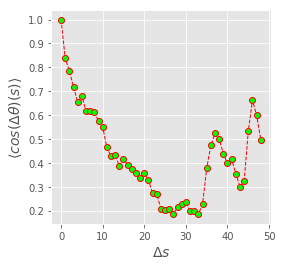

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))
ax.plot(s,dsm, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')

ax.set_xlabel(r'$\Delta s$', fontsize=14)
ax.set_ylabel(r'$\langle cos(\Delta \theta)(s) \rangle$', fontsize=14)
plt.show()

$<cos \Delta \theta> = exp(-\frac{s}{2Lp})$

$x-axis : S \times V \times \Delta t$ <br>
$y-axis : <cos \Delta \theta>$

In [11]:
dsm.shape[0]

49

In [12]:
# 50% of data
s50 = s # s[:-int(s.shape[0]*0.1)]
dsm50 = dsm # dsm[:-int(dsm.shape[0]*.1)] 

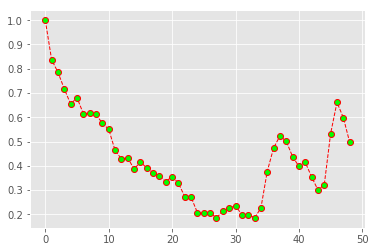

In [13]:
plt.plot(s50,dsm50, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')

In [14]:
def func(s50,Lp):
    return np.exp(-s50/(2*Lp))

popt, pcov = curve_fit(func, s50, dsm50)

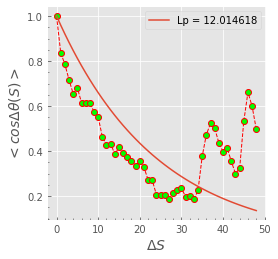

In [16]:
fig, ax = plt.subplots(1,1, figsize=(10*cm,10*cm))

ax.plot(s50,dsm50, marker='o', c='r', ls='--', lw=1, markerfacecolor='lime')
ax.plot(s50, func(s50,*popt), label='Lp = %s'%np.round(popt[0],6))

ax.minorticks_on()
ax.tick_params(which='both', direction='in')

ax.set_xlabel(r'$\Delta S$', fontsize=14)
ax.set_ylabel(r'$<cos \Delta \theta (S) >$', fontsize=14)
plt.legend()

#plt.savefig('fig/R1Lp.pdf', format='pdf', bbox_inches='tight')
plt.show()